# Diabetese Detection Models

This [dataset](https://raw.githubusercontent.com/mansont/datasets-tests/main/diabetese.csv) contains patient data and their diabetese condition: "1" they have diabetes, "0" they do not have diabetese.


Build the following models and compare their performance:
* A logistic regression model
* A single-layer perceptron model
* A multilayer perceptron

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [15]:
url = 'https://raw.githubusercontent.com/mansont/datasets-tests/main/diabetese.csv'
df = pd.read_csv(url)
df.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.shape

(768, 9)

In [17]:
df.dtypes

,0
pregnancies,int64
glucose,int64
diastolic,int64
triceps,int64
insulin,int64
bmi,float64
dpf,float64
age,int64
diabetes,int64


In [18]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# Séparat° des features et de la cible :
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Standardisat° des features :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divis° des données en train/test :
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Modèle 1 : Régress° Logistiq :
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [22]:
# Modèle 2 : Perceptron monocouche :
mono_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
mono_model.fit(X_train, y_train)
mono_pred = mono_model.predict(X_test)

In [23]:
# Modèle 3 : Perceptron multicouche (MLP) :
multi_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
multi_model.fit(X_train, y_train)
multi_pred = multi_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
# Évaluat° des modèles :
def evaluate_model(name, y_test, y_pred, model=None):
    print(f"\n=== {name} ===")
    print("Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))
    print("\nRapport de classification :")
    print(classification_report(y_test, y_pred))
    if model:
        try:
            proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, proba)
        except:
            auc = roc_auc_score(y_test, y_pred)
        print(f"AUC : {auc:.4f}")

# Affiche les résultats :
evaluate_model("Régression Logistique", y_test, log_pred, log_model)
evaluate_model("Perceptron Monocouche", y_test, mono_pred, mono_model)
evaluate_model("Perceptron Multicouche", y_test, multi_pred, multi_model)


=== Régression Logistique ===
Matrice de confusion :
[[79 20]
 [18 37]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

AUC : 0.8147

=== Perceptron Monocouche ===
Matrice de confusion :
[[53 46]
 [29 26]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        99
           1       0.36      0.47      0.41        55

    accuracy                           0.51       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.54      0.51      0.52       154

AUC : 0.5040

=== Perceptron Multicouche ===
Matrice de confusion :
[[78 21]
 [22 33]]

Rapport de classification :
             

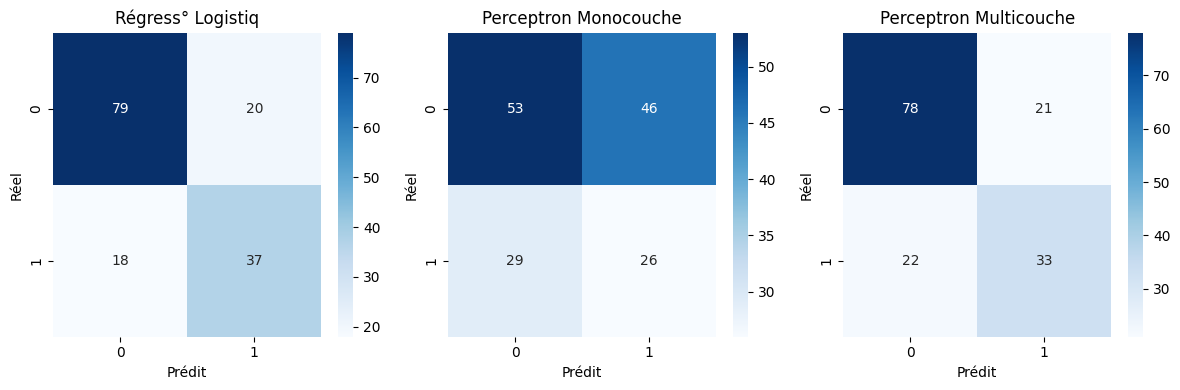

In [26]:
# Visualisat° des matrices de confus° :
models = {
    'Régress° Logistiq': log_pred,
    'Perceptron Monocouche': mono_pred,
    'Perceptron Multicouche': multi_pred
}

plt.figure(figsize=(12, 4))
for i, (name, preds) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
plt.tight_layout()
plt.show()

In [28]:
# Prépare les probabilités ou scores nécessaires :
model_scores = {}

# Régress° Logistiq (avec predict_proba) :
log_proba = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
auc_log = auc(fpr_log, tpr_log)
model_scores["Régression Logistique"] = (fpr_log, tpr_log, auc_log)

# Perceptron monocouche (pas de predict_proba, on utilise les prédict° c proxy) :
fpr_mono, tpr_mono, _ = roc_curve(y_test, mono_pred)
auc_mono = auc(fpr_mono, tpr_mono)
model_scores["Perceptron Monocouche"] = (fpr_mono, tpr_mono, auc_mono)

# MLPClassifier (avec predict_proba) :
multi_proba = multi_model.predict_proba(X_test)[:, 1]
fpr_multi, tpr_multi, _ = roc_curve(y_test, multi_proba)
auc_multi = auc(fpr_multi, tpr_multi)
model_scores["Perceptron Multicouche"] = (fpr_multi, tpr_multi, auc_multi)

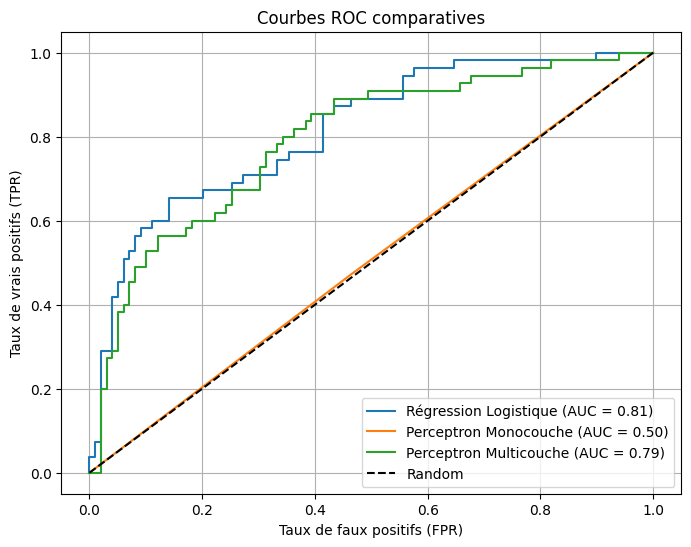

In [29]:
# Trace la courbe ROC :
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in model_scores.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('Courbes ROC comparatives')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Ce que la courbe montre :
Plus la courbe monte vers le coin supérieur gauche, meilleur est le modèle.

L’AUC donne 1 mesure globale de performance (1.0 = parfait, 0.5 = aléatoire).

In [33]:
# Créat° du tableau de résultats :
results = []

# Fct° pr collecter scores des modèles :
def collect_metrics(name, y_test, y_pred, model=None):
    try:
        proba = model.predict_proba(X_test)[:, 1]
        auc_val = roc_auc_score(y_test, proba)
    except:
        auc_val = roc_auc_score(y_test, y_pred)
    results.append({
        'Modèle': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'AUC': auc_val
    })

# Collecte chaq modèle :
collect_metrics("Régression Logistique", y_test, log_pred, log_model)
collect_metrics("Perceptron Monocouche", y_test, mono_pred, mono_model)
collect_metrics("Perceptron Multicouche", y_test, multi_pred, multi_model)

# Créat° du DataFrame (affichage) :
results_df = pd.DataFrame(results)
print("\n📊 Résumé cparatif des perf :\n")
results_df


📊 Résumé cparatif des perf :



,Modèle,Accuracy,F1-score,Recall,Precision,AUC
0,Régression Logistique,0.753247,0.660714,0.672727,0.649123,0.814692
1,Perceptron Monocouche,0.512987,0.409449,0.472727,0.361111,0.504040
2,Perceptron Multicouche,0.720779,0.605505,0.600000,0.611111,0.792470


### Is there a notable difference in the MLP performance when a ReLU, Sigmoid or SoftMax activation function is used?


In [34]:
# Comparais° de 2 fonctions d'activat° ds MLP : 'relu' vs 'logistic'

# Mdèle avec activat° ReLU (par défaut) :
mlp_relu = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42)
mlp_relu.fit(X_train, y_train)
mlp_relu_pred = mlp_relu.predict(X_test)

# Mdèle avec activat° Sigmoid (logistic) :
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=500, random_state=42)
mlp_sigmoid.fit(X_train, y_train)
mlp_sigmoid_pred = mlp_sigmoid.predict(X_test)

# Évalue les 2 vers° :
evaluate_model("Perceptron Multicouche (ReLU)", y_test, mlp_relu_pred, mlp_relu)
evaluate_model("Perceptron Multicouche (Sigmoid)", y_test, mlp_sigmoid_pred, mlp_sigmoid)

# Ajte les 2 au tableau cparatif :
collect_metrics("Perceptron MLP (ReLU)", y_test, mlp_relu_pred, mlp_relu)
collect_metrics("Perceptron MLP (Sigmoid)", y_test, mlp_sigmoid_pred, mlp_sigmoid)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Perceptron Multicouche (ReLU) ===
Matrice de confusion :
[[78 21]
 [22 33]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

AUC : 0.7925

=== Perceptron Multicouche (Sigmoid) ===
Matrice de confusion :
[[78 21]
 [19 36]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

AUC : 0.8149


In [39]:
# Fct° pr calculer et afficher les métriq :
def calculate_metrics(y_test, y_pred, model):
    auc_val = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC pour les modèles avec predict_proba
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC': auc_val
    }

# Calcul des métriq pr ReLU :
relu_metrics = calculate_metrics(y_test, mlp_relu_pred, mlp_relu)

# Calcul des métriq pr Sigmoid :
sigmoid_metrics = calculate_metrics(y_test, mlp_sigmoid_pred, mlp_sigmoid)

# Cparais° des résultats ds 1 DataFrame :
comparaison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Perceptron MLP (ReLU)': [relu_metrics['Accuracy'], relu_metrics['Precision'], relu_metrics['Recall'], relu_metrics['F1-Score'], relu_metrics['AUC']],
    'Perceptron MLP (Sigmoid)': [sigmoid_metrics['Accuracy'], sigmoid_metrics['Precision'], sigmoid_metrics['Recall'], sigmoid_metrics['F1-Score'], sigmoid_metrics['AUC']]
})

print("\n📊 Cparais° des mdèles ReLU vs Sigmoid :\n")
comparaison_df


📊 Cparais° des mdèles ReLU vs Sigmoid :



,Metric,Perceptron MLP (ReLU),Perceptron MLP (Sigmoid)
0,Accuracy,0.720779,0.740260
1,Precision,0.611111,0.631579
2,Recall,0.600000,0.654545
3,F1-Score,0.605505,0.642857
4,AUC,0.792470,0.814876


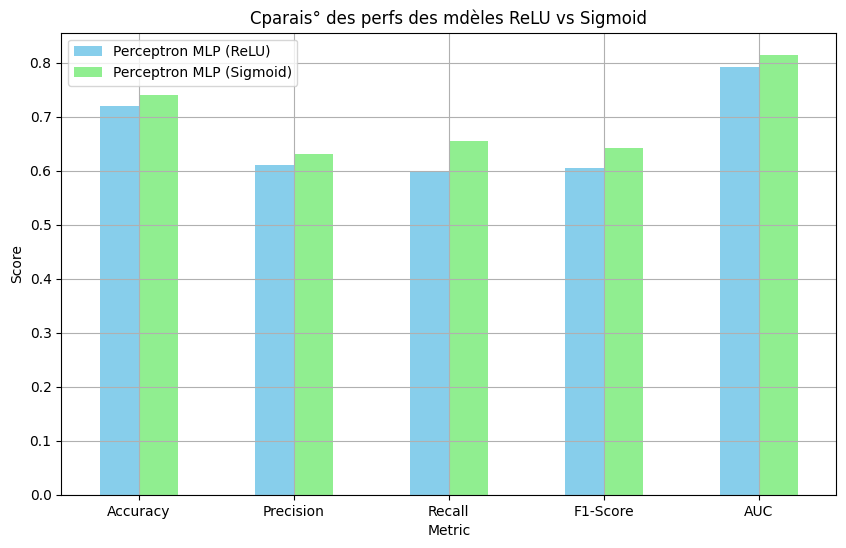

In [42]:
# Visualisat° ss frme de barres :
comparaison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Cparais° des perfs des mdèles ReLU vs Sigmoid')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Il existe donc 1 différence entre le modèle Relu et Sigmoide. Toutefois, cette différence est légère. On améliore 1 peu le modèle.

### Does the network performance change when the density (number of neurons) of the hidden layers change?

In [44]:
# Test de différentes tailles de couches cachées pr le MLP :
hidden_layer_sizes_options = [(50,), (100,), (150,), (200,), (100, 100)]  # Plusieurs configurations

# Dictionnaire pr stocker les résultats :
results = []

# Essai pr chaq config :
for hidden_layers in hidden_layer_sizes_options:
    print(f"\nEntraînement avec {hidden_layers} neurones dans les couches cachées...")

    # Créer et entraîne le mdèle :
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation='relu', max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)

    # Calcule les métriq :
    metrics = calculate_metrics(y_test, mlp_pred, mlp)
    metrics['Configuration des couches'] = hidden_layers
    results.append(metrics)

# Cvertir les résultats en DataFrame :
results_df = pd.DataFrame(results)

# Affiche les résultats
print("\n📊 Cparais° des perfs pr différentes tailles de couches cachées de neurones:\n")
results_df


Entraînement avec (50,) neurones dans les couches cachées...

Entraînement avec (100,) neurones dans les couches cachées...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Entraînement avec (150,) neurones dans les couches cachées...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Entraînement avec (200,) neurones dans les couches cachées...

Entraînement avec (100, 100) neurones dans les couches cachées...

📊 Cparais° des perfs pr différentes tailles de couches cachées de neurones:



,Accuracy,Precision,Recall,F1-Score,AUC,Configuration des couches
0,0.740260,0.636364,0.636364,0.636364,0.799449,"(50,)"
1,0.720779,0.611111,0.600000,0.605505,0.792470,"(100,)"
2,0.766234,0.711111,0.581818,0.640000,0.791185,"(150,)"
3,0.733766,0.620690,0.654545,0.637168,0.799633,"(200,)"
4,0.746753,0.633333,0.690909,0.660870,0.764371,"(100, 100)"


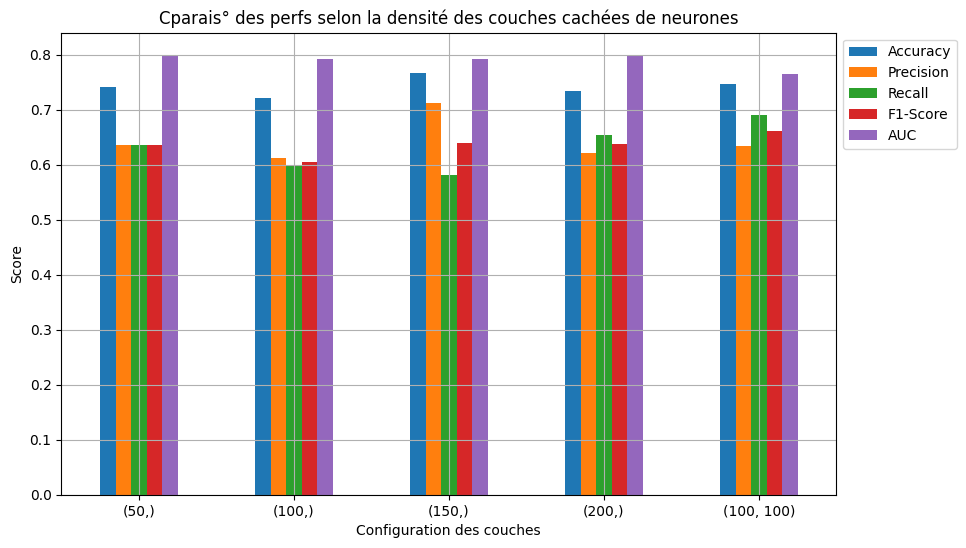

In [50]:
# Visualisat° les perfs :

results_df.set_index('Configuration des couches').plot(kind='bar', figsize=(10, 6))

# Titre du graph :
plt.title('Cparais° des perfs selon la densité des couches cachées de neurones')

# Légende sur la droite :
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajter l'axe Y et affiche le graph :
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()


Oui, les perfs du résx de neurones changent lrsq la densité  des couches cachées change.